In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

c:\Users\syeolekar\.conda\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [4]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()
df

Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1
0,DOV,2023-01-03 00:00:00+00:00,131.672836,135.070007,136.639999,133.720001,135.889999,798000.0,2023,NaN
1,DOV,2023-01-04 00:00:00+00:00,132.745148,136.169998,136.500000,134.720001,136.000000,592900.0,2023,135.070007
2,DOV,2023-01-05 00:00:00+00:00,131.039200,134.419998,136.050003,134.029999,135.259995,549800.0,2023,136.169998
3,DOV,2023-01-06 00:00:00+00:00,135.913437,139.419998,139.949997,135.610001,135.940002,649800.0,2023,134.419998
4,DOV,2023-01-09 00:00:00+00:00,135.416260,138.910004,141.740005,138.600006,139.539993,1064600.0,2023,139.419998
...,...,...,...,...,...,...,...,...,...,...
1923935,MCD,2025-01-24 00:00:00+00:00,285.459991,285.459991,286.850006,283.279999,284.510010,2523000.0,2025,284.429993
1923936,MCD,2025-01-27 00:00:00+00:00,293.089996,293.089996,293.429993,285.809998,286.609985,4343000.0,2025,285.459991
1923937,MCD,2025-01-28 00:00:00+00:00,291.149994,291.149994,294.489990,290.000000,292.399994,3180100.0,2025,293.089996
1923938,MCD,2025-01-29 00:00:00+00:00,290.109985,290.109985,293.140015,290.000000,291.380005,2358300.0,2025,291.149994


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [5]:
df.sample(n = 5)

Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1
1706478,LUV,2016-03-09 00:00:00+00:00,38.516941,42.320000,42.410000,41.310001,41.709999,6965700.0,2016,41.590000
278973,DVA,2013-08-22 00:00:00+00:00,54.985001,54.985001,55.505001,54.639999,55.345001,1430000.0,2013,55.244999
1247864,OXY,2022-07-22 00:00:00+00:00,59.139099,61.060001,63.000000,60.410000,62.000000,14198400.0,2022,62.000000
1693452,TXT,2009-07-27 00:00:00+00:00,10.787559,11.150000,11.300000,11.010000,11.250000,5905900.0,2009,11.310000
16208,DTE,2018-04-12 00:00:00+00:00,69.378426,86.893616,88.221275,86.655319,88.093620,716163.0,2018,87.948936


In [6]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [8]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5046, 10), (50464, 10))

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

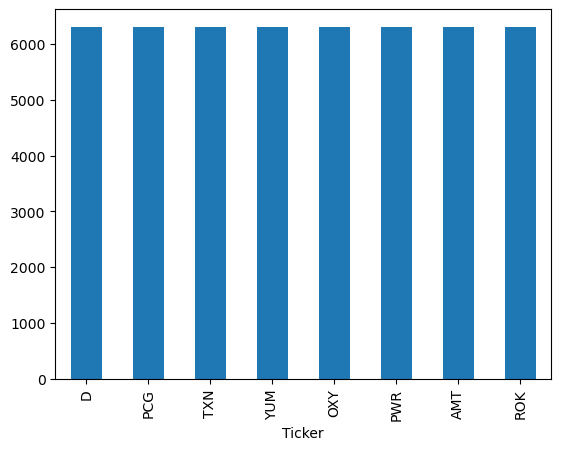

In [10]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

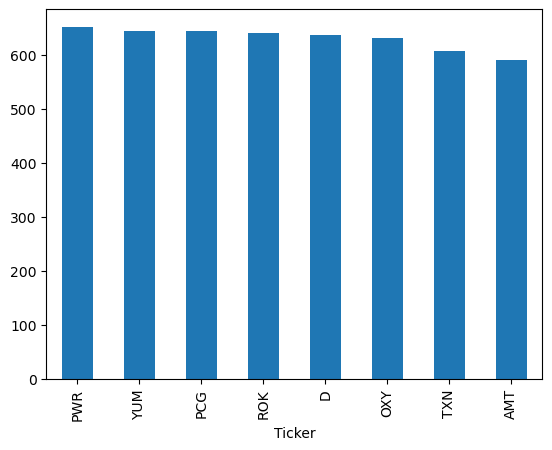

In [11]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

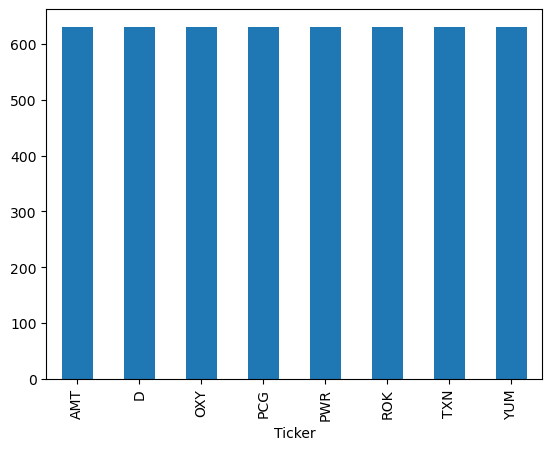

In [13]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\syeolekar\AppData\Local\Temp\ipykernel_4368\2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

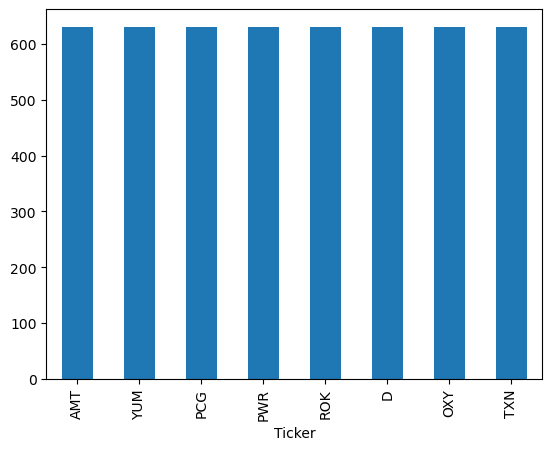

In [15]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')